In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
from scipy import stats

In [3]:
df = pd.read_csv('Service.csv')

In [4]:
df.head()

,Technician,Manufacturer,Job,Service_Time
0,1,1,1,62
1,1,1,2,48
2,1,1,3,63
3,1,1,4,57
4,1,1,5,69


In [5]:
df.describe()

,Technician,Manufacturer,Job,Service_Time
count,45.000000,45.000000,45.000000,45.000000
mean,2.000000,2.000000,3.000000,55.822222
std,0.825723,0.825723,1.430194,8.448477
min,1.000000,1.000000,1.000000,39.000000
25%,1.000000,1.000000,2.000000,50.000000
50%,2.000000,2.000000,3.000000,56.000000
75%,3.000000,3.000000,4.000000,62.000000
max,3.000000,3.000000,5.000000,70.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Technician    45 non-null     int64
 1   Manufacturer  45 non-null     int64
 2   Job           45 non-null     int64
 3   Service_Time  45 non-null     int64
dtypes: int64(4)
memory usage: 1.5 KB


In [10]:
df.shape

(45, 4)

# Problem 1
The staff of a service center for electrical appliances include three technicians who specialize in
repairing three widely used electrical appliances by three different manufacturers. It was desired
to study the effects of Technician and Manufacturer on the service time. Each technician was
randomly assigned five repair jobs on each manufacturer's appliance and the time to complete
each job (in minutes) was recorded. The data for this particular experiment is thus attached.

### 1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘Manufacturer’ and ‘Technician individually.

#### Manufacturer
Null hypothesis (H0):Among all the 3 categories of Manufacturer (1,2,3) the mean service time are same.

Alternate hypothesis (HA):: The mean service time is different in atleast one category of Manufacturer.

#### Technician
Null hypothesis (H0):Among all the 3 categories of Technician (1,2,3) the mean service time are same.

Alternate hypothesis (HA):: The mean service time is different in atleast one category of Technician.

### 1.2) Perform one-way ANOVA for variable ‘Manufacturer’ with respect to the variable ‘Service Time’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results

In [8]:
formula = 'Service_Time ~ C(Manufacturer)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                   df       sum_sq    mean_sq         F    PR(>F)
C(Manufacturer)   2.0    28.311111  14.155556  0.191029  0.826822
Residual         42.0  3112.266667  74.101587       NaN       NaN


Since the p value (0.826822) is greater than the significance level (considering alpha = 0.05), we fail to reject the null hypothesis.

Therefore, the mean service time are the same across all categories of Manufacturer.

### 1.3) Perform one-way ANOVA for variable ‘Technician’ with respect to the variable ‘Service Time’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results

In [9]:
formula = 'Service_Time ~ C(Technician)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df       sum_sq    mean_sq        F    PR(>F)
C(Technician)   2.0    24.577778  12.288889  0.16564  0.847902
Residual       42.0  3116.000000  74.190476      NaN       NaN


Since the p value (0.847902) is greater than the significance level (considering alpha = 0.05), we fail to reject the null hypothesis.

Therefore, the mean service time are the same across all categories of Technician.

### 1.4) Analyse the effects of one variable on another with the help of an interaction plot. What is an interaction between two treatments? [hint: use the ‘pointplot’ function from the ‘seaborn’ graphical subroutine in Python]

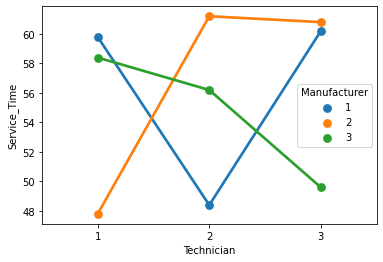

In [10]:
sns.pointplot(x='Technician', y='Service_Time', hue='Manufacturer', data=df, ci=None);

The above given interaction plot shows a considerable amount of interaction between Technician and Manufacturer.

Manufacturer 1- 

*The service time is high with respect to technician 1 and 3.

*The service time is least with respect to technician 2.

Manufacturer 2-

*The service time is less with respect to technician 1.

*The service time is high with respect to technician 2 and 3.

Manufacturer 3-

*The service time is slight lesser than manufacturer 1 with respect to technician 1.

*The service time is found in mid than manufacturer 1 and 2 with respect to technician 2.

*The service time is less with respect to technician 3.

From the interaction plot, we can point out that service time differs with respect to each Technician and Manufacturer.

### 1.5) Perform a two-way ANOVA based on the variables ‘Manufacturer’ &    ‘Technician’ with respect to the variable ‘Service Time’ and state your results.


In [11]:
formula = 'Service_Time ~ C(Manufacturer) + C(Technician) + C(Manufacturer):C(Technician)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                                 df       sum_sq     mean_sq         F  \
C(Manufacturer)                 2.0    28.311111   14.155556  0.272164   
C(Technician)                   2.0    24.577778   12.288889  0.236274   
C(Manufacturer):C(Technician)   4.0  1215.288889  303.822222  5.841487   
Residual                       36.0  1872.400000   52.011111       NaN   

                                 PR(>F)  
C(Manufacturer)                0.763283  
C(Technician)                  0.790779  
C(Manufacturer):C(Technician)  0.000994  
Residual                            NaN  


From the above table, we see that p value for combined effect of Manufacturer and Technician on Service time (0.000994) is less than the significance level (considering alpha = 0.05), therefore we reject null hypothesis.

Thus, we see that interaction between 'Manufacturer' and 'Technician' has an impact on the mean service time.

### 1.6) Mention the business implications of performing ANOVA for this particular case study. 

Analysis of variance (ANOVA) is an analysis tool used in statistics that splits an observed aggregate variability found inside a data set into two parts: systematic factors and random factors. The systematic factors have a statistical influence on the given data set, while the random factors do not.

-> This case study deals with dependence of service time on Technician and Manufacturer i.e each at 3 levels.

-> ANOVA result indicates that the service time does not depend on both technician and manufacturer.

-> The interaction effect is not significant as technician and manufacturer differs drastically with each other values on interaction between them.

# Problem 2
 Statement: The ‘Hair Salon.csv’ dataset contains various variables used for the context of Market Segmentation. This particular case study is based on various parameters of a salon chain of hair products. You are expected to do Principal Component Analysis for this case study according to the instructions given in the following rubric. Note: This particular dataset contains the target variable satisfaction as well. Please do drop this variable before doing Principal Component Analysis.

In [12]:
salon = pd.read_csv('Hair Salon (1).csv')

In [13]:
salon.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


In [14]:
salon.describe()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,50.500000,7.810000,3.672000,5.365000,5.442000,4.010000,5.805000,5.12300,6.974000,6.043000,4.27800,3.886000,6.918000
std,29.011492,1.396279,0.700516,1.530457,1.208403,1.126943,1.315285,1.07232,1.545055,0.819738,0.92884,0.734437,1.191839
min,1.000000,5.000000,2.200000,1.300000,2.600000,1.900000,2.300000,2.90000,3.700000,4.100000,2.00000,1.600000,4.700000
25%,25.750000,6.575000,3.275000,4.250000,4.600000,3.175000,4.700000,4.50000,5.875000,5.400000,3.70000,3.400000,6.000000
50%,50.500000,8.000000,3.600000,5.400000,5.450000,4.000000,5.750000,4.90000,7.100000,6.100000,4.40000,3.900000,7.050000
75%,75.250000,9.100000,3.925000,6.625000,6.325000,4.800000,6.800000,5.80000,8.400000,6.600000,4.80000,4.425000,7.625000
max,100.000000,10.000000,5.700000,8.500000,7.800000,6.500000,8.400000,8.20000,9.900000,8.100000,6.70000,5.500000,9.900000


In [15]:
salon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            100 non-null    int64  
 1   ProdQual      100 non-null    float64
 2   Ecom          100 non-null    float64
 3   TechSup       100 non-null    float64
 4   CompRes       100 non-null    float64
 5   Advertising   100 non-null    float64
 6   ProdLine      100 non-null    float64
 7   SalesFImage   100 non-null    float64
 8   ComPricing    100 non-null    float64
 9   WartyClaim    100 non-null    float64
 10  OrdBilling    100 non-null    float64
 11  DelSpeed      100 non-null    float64
 12  Satisfaction  100 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 10.3 KB


From the info of the data, we can infer that there are no null values in the dataset. All the variables in the dataset are continuous except ID.

In [16]:
salon.shape

(100, 13)

There are total 100 rows and 13 columns in the dataset

In [17]:
salon.drop('ID',axis = 1,inplace = True)

Dropping ID variable as it does not add any significant value to our modelling.

### 2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

In [18]:
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

ProdQual
Skew : -0.2445


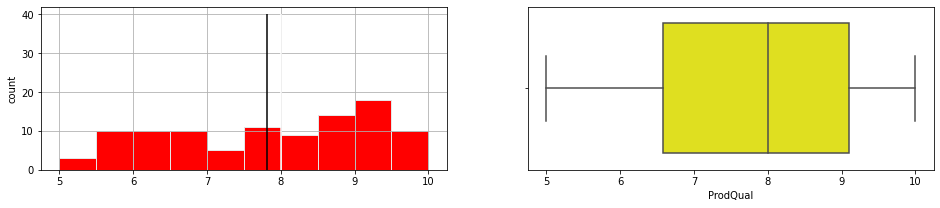

Ecom
Skew : 0.6604


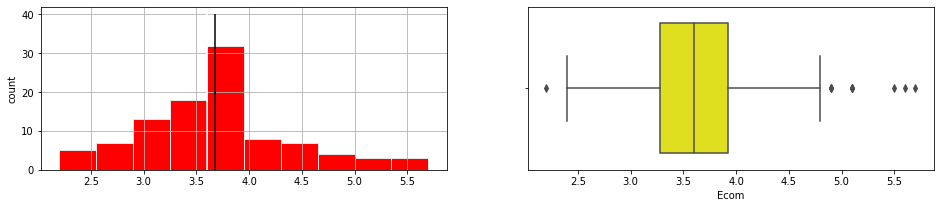

TechSup
Skew : -0.2033


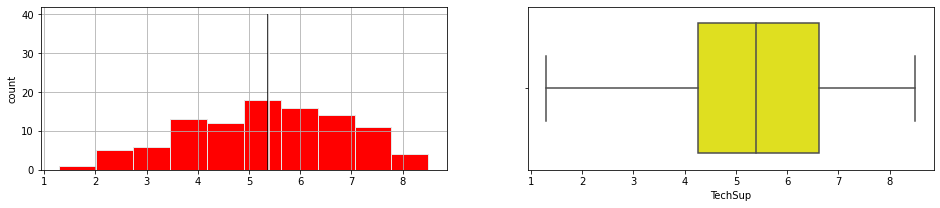

CompRes
Skew : -0.1358


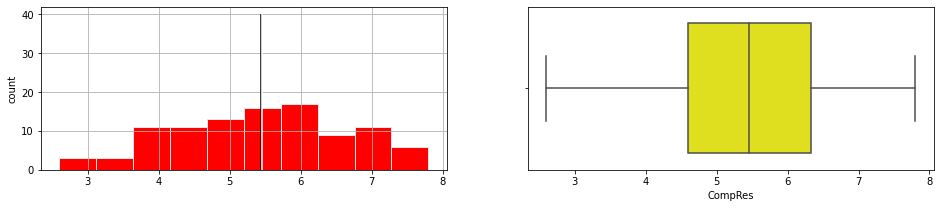

Advertising
Skew : 0.0436


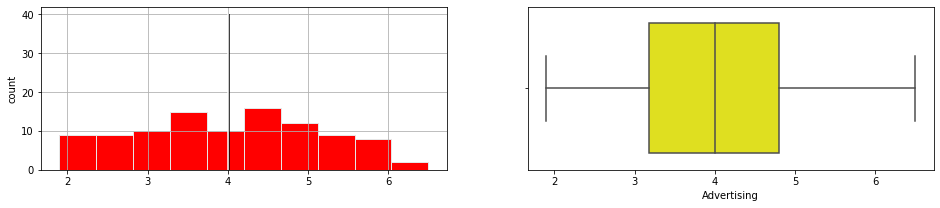

ProdLine
Skew : -0.0924


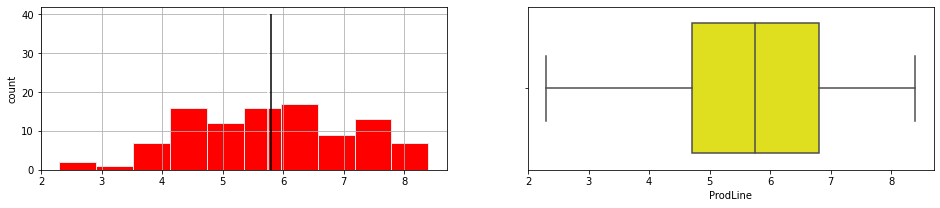

SalesFImage
Skew : 0.3769


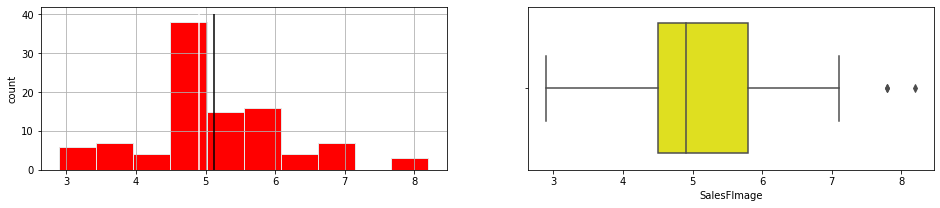

ComPricing
Skew : -0.2399


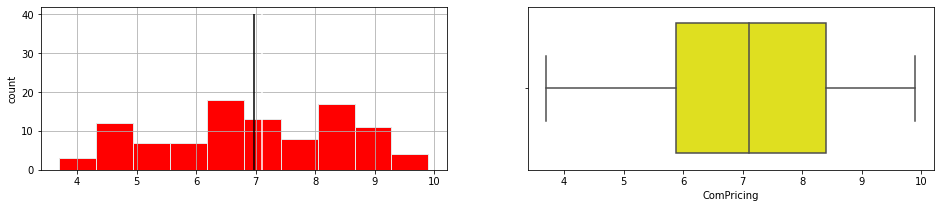

WartyClaim
Skew : 0.0084


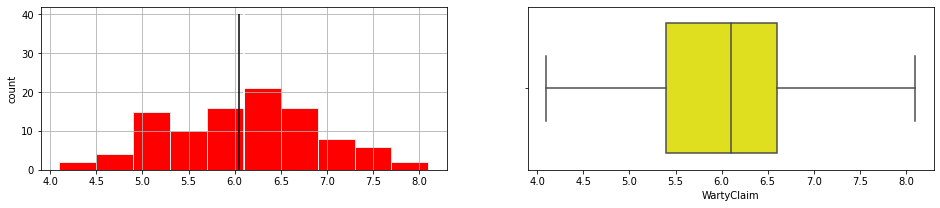

OrdBilling
Skew : -0.3335


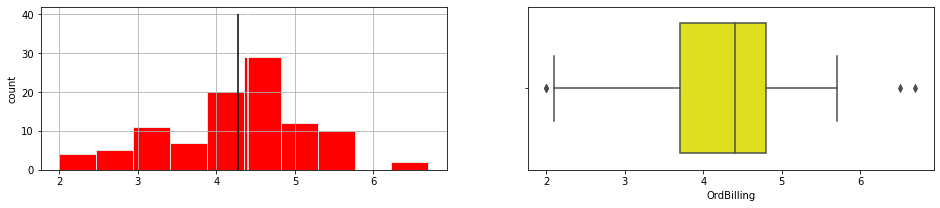

DelSpeed
Skew : -0.4631


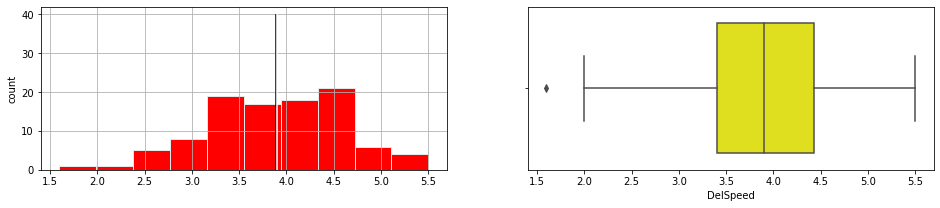

Satisfaction
Skew : 0.0782


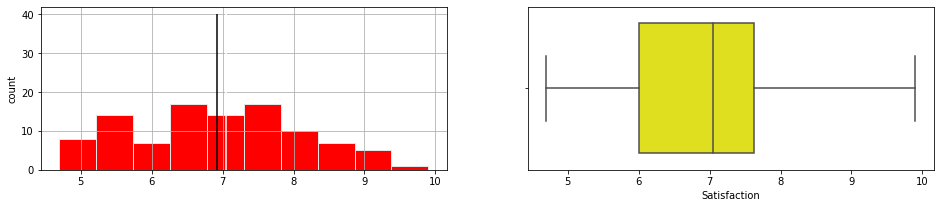

In [19]:
cont_cols = list(salon.columns)
for col in cont_cols:
    print(col)
    print('Skew :',round(salon[col].skew(),4))
    plt.figure(figsize=(16,3))
    plt.subplot(1,2,1)
    salon[col].hist(bins=10,edgecolor='#E6E6E6', color='Red')
    plt.vlines(salon[col].mean(),ymin = 0, ymax = 40,color = 'Black')
    plt.vlines(salon[col].median(),ymin = 0, ymax = 40,color = 'White')
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(salon[col],color='Yellow')
    plt.show()

The diagram shows that Ecom, Advertising, SalesFImage, WartClaim, Satisfaction are right skewed but moderately whereas ProdQual, TechSup, CompRes, ProdLine, ComPricing, OrdBilling, DelSpeed are left skewed.

The variables Ecom, SalesFImage, OrdBilling, DelSpeed have outliers.

The variables ProdQual, TechSup, CompRes, Advertising, ProdLine, Compricing, WartClaim, Satisfaction does not posses outliers.

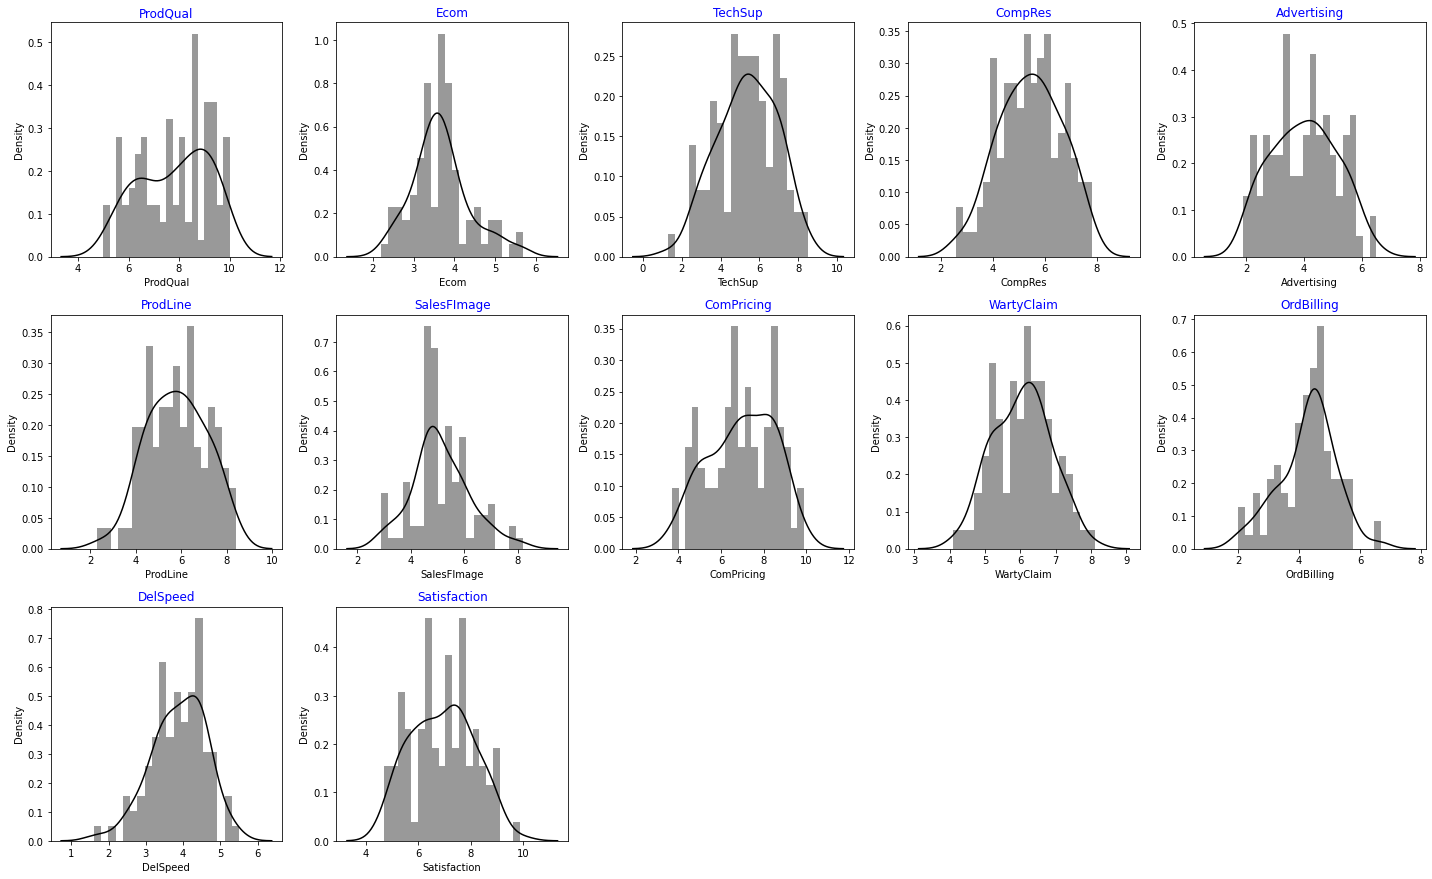

In [20]:
data_scatter=salon.copy(deep=True)
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_scatter.columns)):
    ax=fig.add_subplot(5,5,i+1)
    sns.distplot(data_scatter[data_scatter.columns[i]], bins=20, color= 'Black')
    ax.set_title(data_scatter.columns[i],color='Blue')
plt.tight_layout()


ProdQual vs Satisfaction


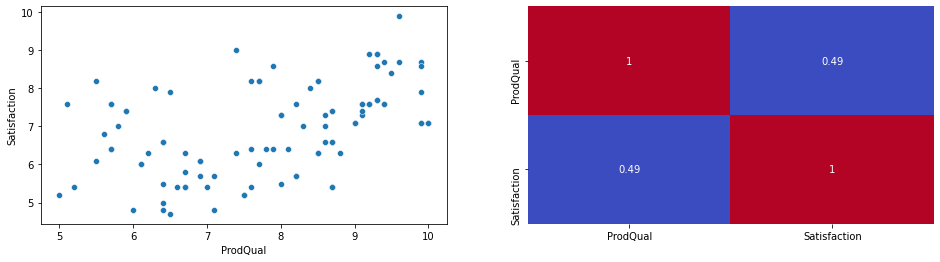

Ecom vs ProdQual


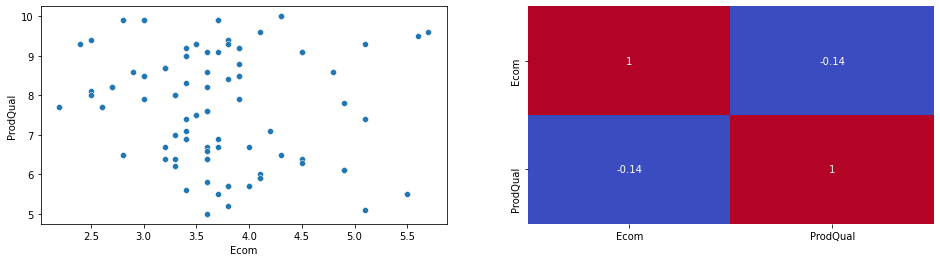

TechSup vs Ecom


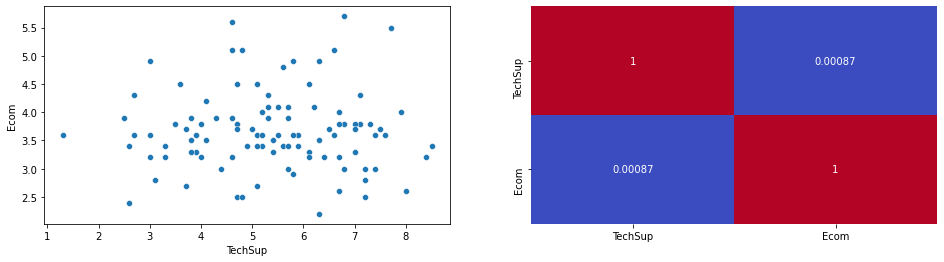

CompRes vs TechSup


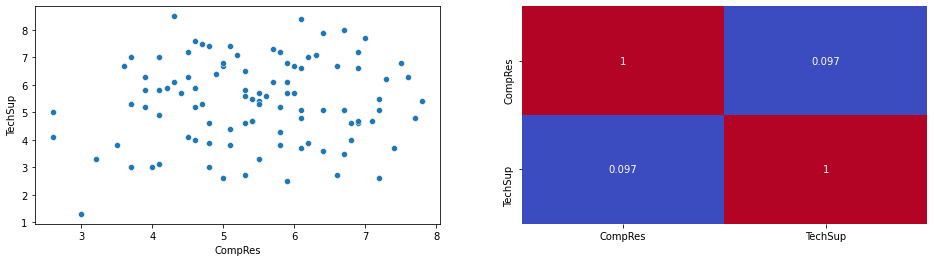

Advertising vs CompRes


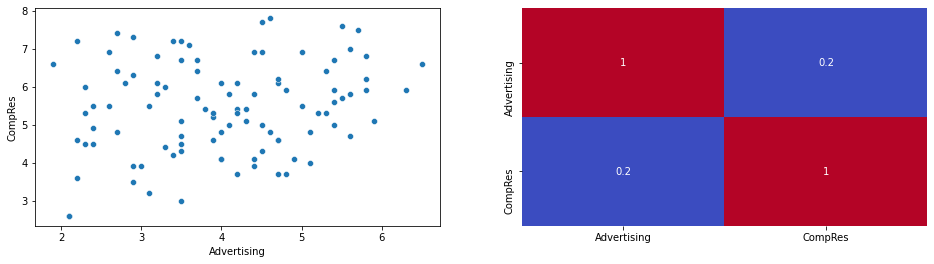

ProdLine vs Advertising


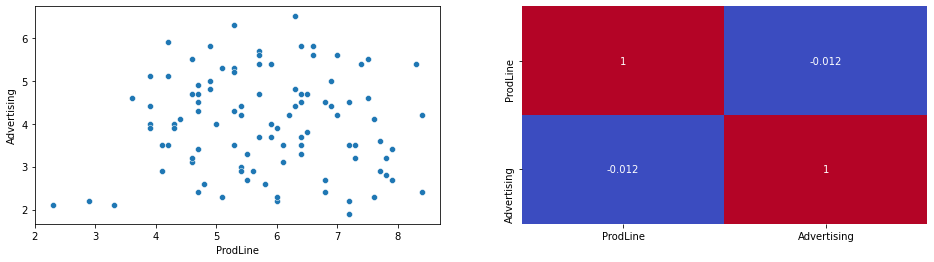

SalesFImage vs ProdLine


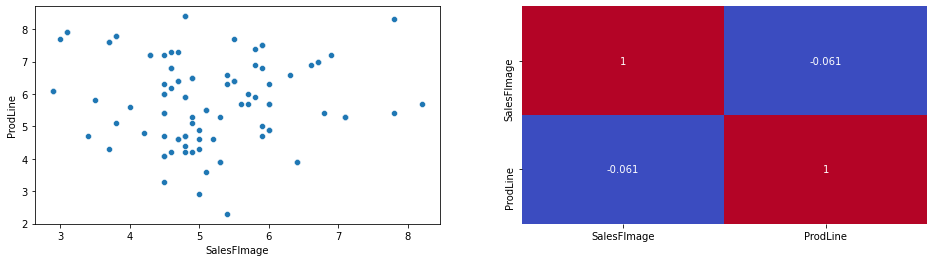

ComPricing vs SalesFImage


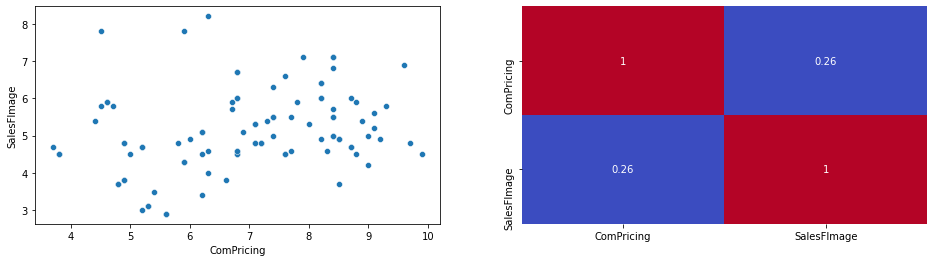

WartyClaim vs ComPricing


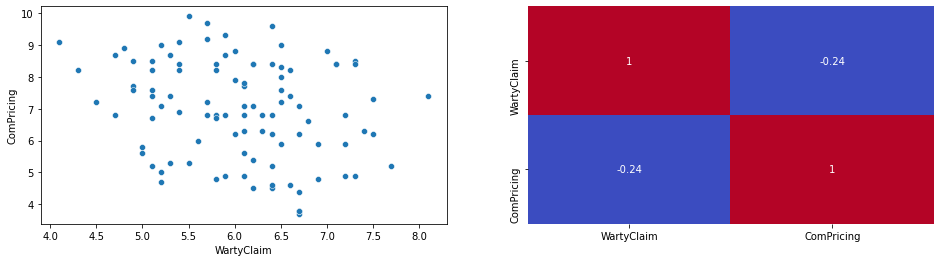

OrdBilling vs WartyClaim


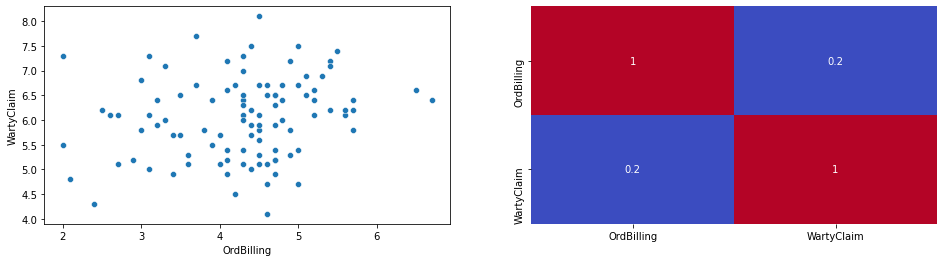

DelSpeed vs OrdBilling


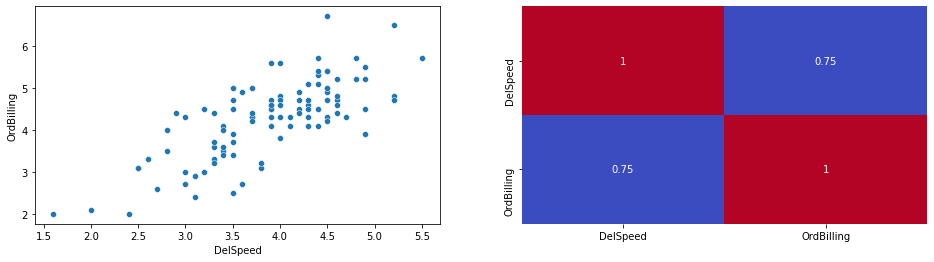

Satisfaction vs DelSpeed


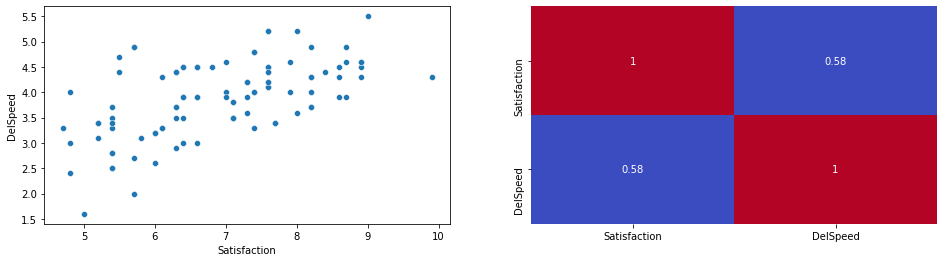

In [21]:
sns.color_palette("rocket")

cont_cols = list(salon.columns)
for col in range(0,len(cont_cols)):
    print(cont_cols[col],'vs',cont_cols[col-1])
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    sns.scatterplot(salon[cont_cols[col]],salon[cont_cols[col-1]])
    plt.subplot(1,2,2)
    sns.heatmap(np.corrcoef(salon[cont_cols[col]],salon[cont_cols[col-1]]),annot=True, 
                yticklabels=[cont_cols[col],cont_cols[col-1]],xticklabels=[cont_cols[col],cont_cols[col-1]]
               ,cmap='coolwarm',cbar=False)
    plt.show()

<AxesSubplot:>

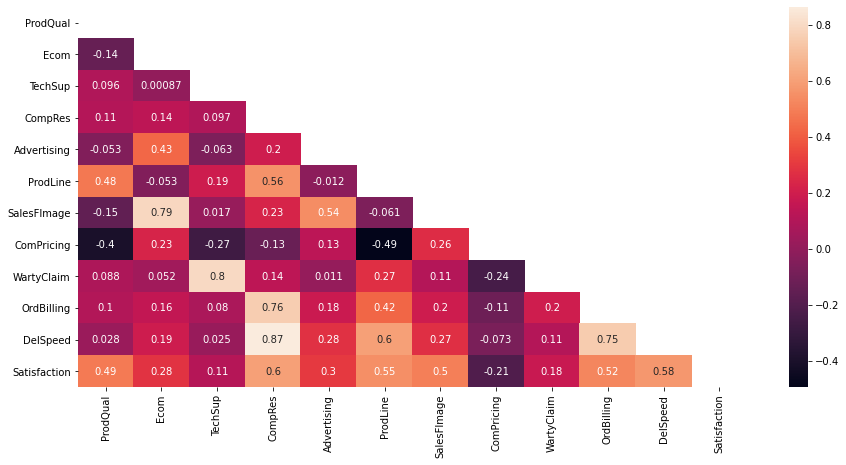

In [22]:
sns.color_palette("coolwarm")
plt.figure(figsize=(15,7))
mask = np.triu(np.ones_like(salon.corr(), dtype=bool))
sns.heatmap(salon.corr(),annot = True,mask=mask)

 There is high positive correlation among following variables.
 
 1.Ecom and SalesFImage
 
 2.TechSup and WartyClaim
 
 3.CompRes and OrdBilling
 
 4.CompRes and DelSpeed
 
 5.OrdBilling and Delspeed

### 2.2) Scale the variables and write the inference for using the type of scaling function for this case study.

Before Scaling

In [23]:
salon.var()

ProdQual        1.949596
Ecom            0.490723
TechSup         2.342298
CompRes         1.460238
Advertising     1.270000
ProdLine        1.729975
SalesFImage     1.149870
ComPricing      2.387196
WartyClaim      0.671971
OrdBilling      0.862743
DelSpeed        0.539398
Satisfaction    1.420481
dtype: float64

In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
DF = pd.DataFrame(ss.fit_transform(salon),columns=cont_cols)
DF.head().T

,0,1,2,3,4
ProdQual,0.496660,0.280721,1.000518,-1.014914,0.856559
Ecom,0.327114,-1.394538,-0.390241,-0.533712,-0.390241
TechSup,-1.881421,-0.174023,0.154322,1.073690,-0.108354
CompRes,0.380922,1.462141,0.131410,-1.448834,-0.700298
Advertising,0.704543,-0.544014,1.239639,0.615361,-1.614207
ProdLine,-0.691530,1.600835,1.218774,-0.844354,0.149004
SalesFImage,0.821973,-1.896068,0.634522,-0.583910,-0.583910
ComPricing,-0.113185,-1.088915,-1.609304,1.187789,-0.113185
WartyClaim,-1.646582,-0.665744,0.192489,1.173327,0.069885
OrdBilling,0.781230,-0.409009,1.214044,0.023805,0.240212


After Scaling

In [25]:
DF.var()

ProdQual        1.010101
Ecom            1.010101
TechSup         1.010101
CompRes         1.010101
Advertising     1.010101
ProdLine        1.010101
SalesFImage     1.010101
ComPricing      1.010101
WartyClaim      1.010101
OrdBilling      1.010101
DelSpeed        1.010101
Satisfaction    1.010101
dtype: float64

To bring all variables on a same scale, scaling is performed. In scaling, data on all the dimensions are subtracted from their means to shift the data points to the origin. i.e. the data is centered on the origins.Comparing the variables with each other won't be fruitful until and unless all of them are compared on a same scale. Scaling helps in bringing all variables on a same scale by shifting data points to origin.

As we can see from the above data df, data after scaling will transform every value in such a way that the mean will be 0 and the standard deviation will be 1.

### 2.3) Comment on the comparison between covariance and the correlation matrix after scaling.

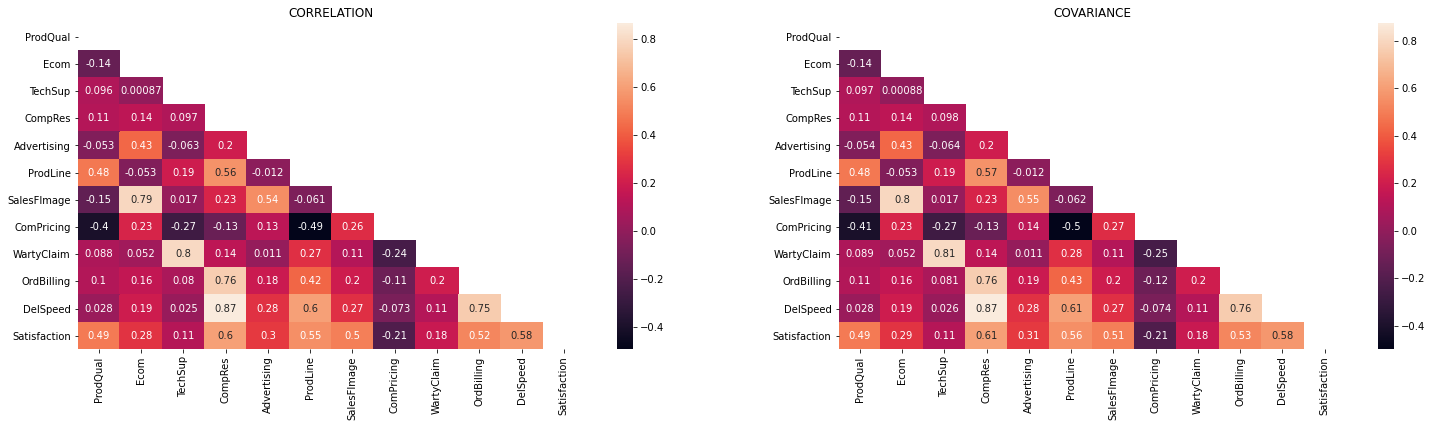

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (25,6))
mask = np.triu(np.ones_like(DF.corr(), dtype=bool))
sns.heatmap(DF.corr(),annot = True,mask=mask,ax = ax1)
ax1.title.set_text("CORRELATION")
mask = np.triu(np.ones_like(DF.cov(), dtype=bool))
sns.heatmap(DF.cov(),annot = True,mask=mask,ax = ax2)
ax2.title.set_text("COVARIANCE")
plt.show()

From the above images, it is clear that the correlation and covariance matrices are same after z- score(mean=0 and sd=1) scaling is performed.

### 2.4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.

Before Scaling

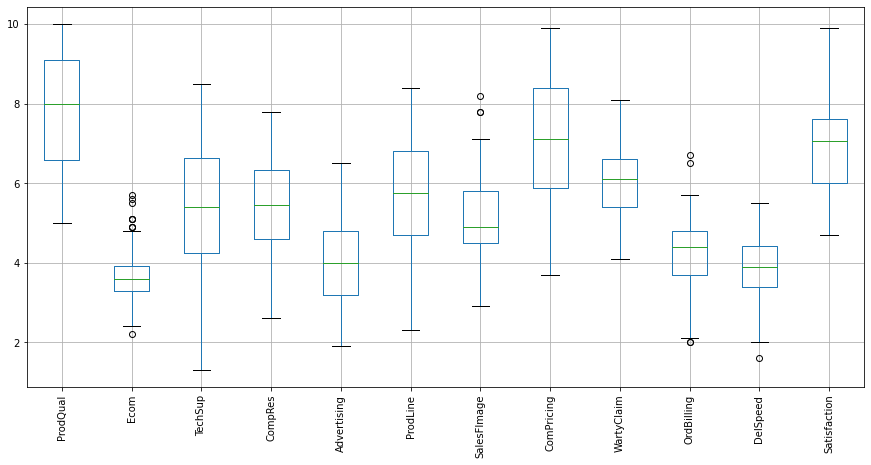

In [41]:
plt.figure(figsize=(15,7))
salon.boxplot()
plt.xticks(rotation=90)
plt.show()

After Scaling

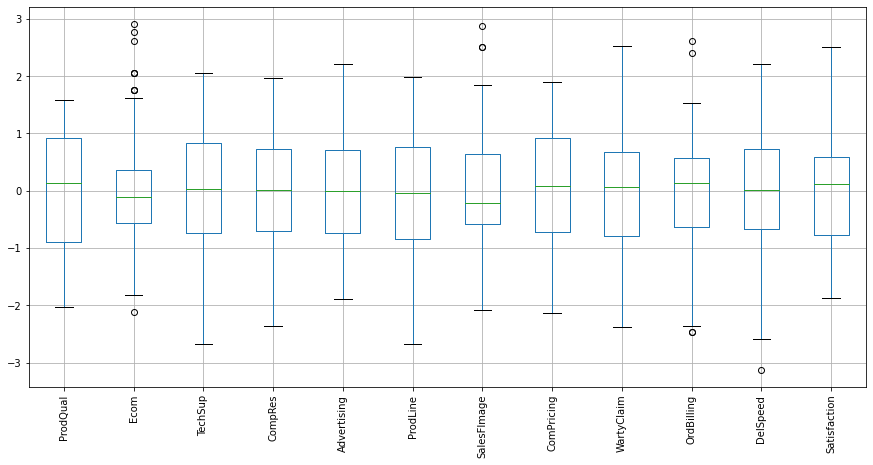

In [27]:
plt.figure(figsize=(15,7))
DF.boxplot()
plt.xticks(rotation=90)
plt.show()

From the above image, it is clear that the variables before and after scaling possess same outliers.

The variables Ecom, OrdBilling, SalesFImage, DelSpeed possess outliers.

### 2.5) Build the covariance matrix, eigenvalues and eigenvector.

In [28]:
from sklearn.decomposition import PCA
n_comp = len(cont_cols)
pca = PCA(n_components=n_comp)
df_pca_transformed = pca.fit_transform(DF)
pc_comps = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12']
pc_df_pcafunc = pd.DataFrame(np.round(pca.components_,2),index=pc_comps,columns=cont_cols)
pc_df_pcafunc.head(12).T

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
ProdQual,-0.16,-0.31,0.07,0.61,-0.25,0.36,0.13,-0.33,-0.19,0.20,0.23,-0.22
Ecom,-0.17,0.44,-0.24,0.20,-0.19,-0.47,0.01,-0.51,-0.22,0.04,-0.03,0.35
TechSup,-0.13,-0.24,-0.62,-0.18,-0.04,0.12,-0.01,0.08,-0.55,-0.42,-0.02,-0.11
CompRes,-0.42,0.00,0.20,-0.28,-0.03,0.01,-0.00,0.15,-0.44,0.59,-0.38,-0.06
Advertising,-0.18,0.36,-0.09,0.21,0.76,0.42,-0.07,-0.12,-0.04,-0.03,-0.10,0.05
ProdLine,-0.35,-0.30,0.11,0.10,0.03,-0.20,-0.63,-0.22,0.23,-0.25,-0.35,-0.19
SalesFImage,-0.22,0.46,-0.24,0.20,-0.14,-0.17,0.02,0.33,0.17,0.04,0.07,-0.67
ComPricing,0.13,0.42,0.05,-0.24,-0.49,0.59,-0.34,-0.16,0.03,-0.09,-0.11,0.01
WartyClaim,-0.17,-0.20,-0.61,-0.19,-0.02,0.14,-0.04,-0.11,0.50,0.45,0.08,0.16
OrdBilling,-0.39,0.01,0.16,-0.31,-0.05,0.09,0.63,-0.33,0.25,-0.32,-0.16,-0.15


In [29]:
# Eigen Vectors
pca.components_

array([[-0.15855116, -0.1661857 , -0.12514332, -0.42263337, -0.1807615 ,
        -0.35283874, -0.21794995,  0.13483701, -0.17499123, -0.38797945,
        -0.4223407 , -0.41302455],
       [-0.31313152,  0.44059261, -0.23828985,  0.00134121,  0.35724531,
        -0.29778667,  0.46488879,  0.41776317, -0.2011842 ,  0.00906156,
         0.05445737,  0.02390379],
       [ 0.07356137, -0.23651951, -0.61631236,  0.19665426, -0.0898675 ,
         0.11122737, -0.2409419 ,  0.0516667 , -0.60545958,  0.15503653,
         0.21799023,  0.02873859],
       [ 0.61407082,  0.19628244, -0.17941402, -0.27970497,  0.20600014,
         0.10008828,  0.19948826, -0.24079483, -0.18959933, -0.30668573,
        -0.28990302,  0.33118987],
       [-0.24964531, -0.18886909, -0.03977108, -0.03340857,  0.76107633,
         0.0250607 , -0.14209236, -0.4896484 , -0.02158615, -0.04908379,
         0.06222027, -0.22967423],
       [ 0.36499541, -0.46540483,  0.12392836,  0.01495235,  0.4189084 ,
        -0.1958228 , -

In [30]:
# Eigen values 
print('Eigen Values : ',pca.explained_variance_)

Eigen Values :  [4.08369694 2.57871152 1.70931735 1.22984483 0.6423868  0.57427406
 0.40689671 0.32775774 0.23852472 0.14568036 0.10013985 0.08398124]


In [32]:
# Covariance matrix
cov_matrix = np.cov(DF.T)
eigen_values,eigen_vectors_trnspsd = np.linalg.eig(cov_matrix)
pcs = eigen_vectors_trnspsd.T
pc_df_numpy = pd.DataFrame(np.round(pcs,2),index=pc_comps,columns=cont_cols)
pc_df_numpy.head(12).T

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
ProdQual,0.16,-0.31,-0.07,-0.61,-0.25,0.36,-0.13,-0.33,0.19,-0.20,-0.22,0.23
Ecom,0.17,0.44,0.24,-0.20,-0.19,-0.47,-0.01,-0.51,0.22,-0.04,0.35,-0.03
TechSup,0.13,-0.24,0.62,0.18,-0.04,0.12,0.01,0.08,0.55,0.42,-0.11,-0.02
CompRes,0.42,0.00,-0.20,0.28,-0.03,0.01,0.00,0.15,0.44,-0.59,-0.06,-0.38
Advertising,0.18,0.36,0.09,-0.21,0.76,0.42,0.07,-0.12,0.04,0.03,0.05,-0.10
ProdLine,0.35,-0.30,-0.11,-0.10,0.03,-0.20,0.63,-0.22,-0.23,0.25,-0.19,-0.35
SalesFImage,0.22,0.46,0.24,-0.20,-0.14,-0.17,-0.02,0.33,-0.17,-0.04,-0.67,0.07
ComPricing,-0.13,0.42,-0.05,0.24,-0.49,0.59,0.34,-0.16,-0.03,0.09,0.01,-0.11
WartyClaim,0.17,-0.20,0.61,0.19,-0.02,0.14,0.04,-0.11,-0.50,-0.45,0.16,0.08
OrdBilling,0.39,0.01,-0.16,0.31,-0.05,0.09,-0.63,-0.33,-0.25,0.32,-0.15,-0.16


In [33]:
sorted_eig_vals = pd.Series(eigen_values).sort_values(ascending =False)
sorted_eig_vals

0     4.083697
1     2.578712
2     1.709317
3     1.229845
4     0.642387
5     0.574274
6     0.406897
7     0.327758
8     0.238525
9     0.145680
11    0.100140
10    0.083981
dtype: float64

The covariance matrix, Eigen vectors, Eigen values are derived above.

### 2.6) Write the explicit form of the first PC (in terms of Eigen Vectors)

The equation for first PC would be the cross multiplication of variables and eigen vectors of 0 index.Eigen vectors derived from sklearn,Numpy and statsmodels might differ a bit numerically or on the sign perspective.

In [34]:
pc_df_pcafunc.loc['PC1',:]

ProdQual       -0.16
Ecom           -0.17
TechSup        -0.13
CompRes        -0.42
Advertising    -0.18
ProdLine       -0.35
SalesFImage    -0.22
ComPricing      0.13
WartyClaim     -0.17
OrdBilling     -0.39
DelSpeed       -0.42
Satisfaction   -0.41
Name: PC1, dtype: float64

### 2.7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate? Perform PCA and export the data of the Principal Component scores into a data frame.

In [35]:
tot = np.sum(sorted_eig_vals)
var_exp = [(i/tot) * 100 for i in sorted_eig_vals]
cum_var_exp = np.cumsum(var_exp)
print('Explained variance by each principal component : \n',np.round(var_exp,2))

Explained variance by each principal component : 
 [33.69 21.27 14.1  10.15  5.3   4.74  3.36  2.7   1.97  1.2   0.83  0.69]


The first PC explain 33% of variance is the dataset followed by 21% of variance explained by PC2 and so on.

In [36]:
print('Cumulative explained variance : \n',np.round(cum_var_exp,2))

Cumulative explained variance : 
 [ 33.69  54.96  69.07  79.21  84.51  89.25  92.61  95.31  97.28  98.48
  99.31 100.  ]


Text(0, 0.5, '% cumulative variance explained')

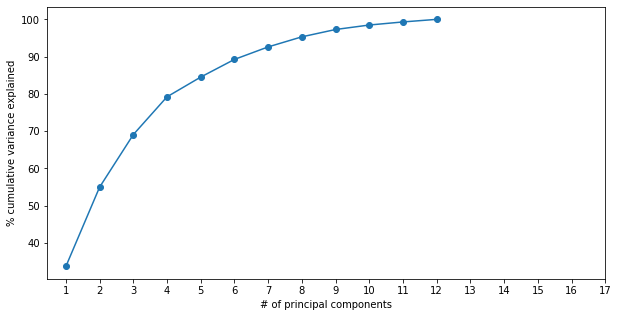

In [42]:
plt.figure(figsize=(10,5))
plt.plot(cum_var_exp,marker = 'o')
plt.xticks(np.arange(0,17),labels=np.arange(1,18))
plt.xlabel('# of principal components')
plt.ylabel('% cumulative variance explained')

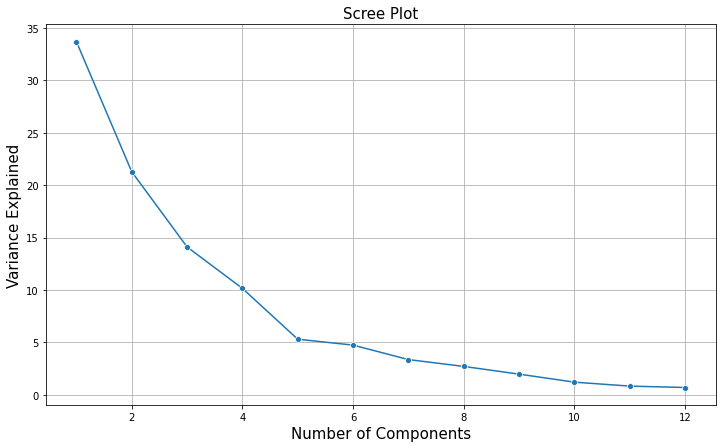

In [46]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

The Cumulative% gives the percentage of variance accounted for by the n components. For example,the cumulative percentage for the second component is the sum of the percentage of variance for the first and second components. It helps in deciding the number of components by selecting the components which explained the high variance.

In the above array we see that the first feature explains 33% of the variance within our data set while the first two explains 54% and so on.

### 2.8) Mention the business implication of using the Principal Component Analysis for this case study

In [38]:
df_num = DF.select_dtypes(['float64','int64'])
df_cat = DF.select_dtypes(['object'])

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12, random_state=123)
pca_transformed = pca.fit_transform(DF)

In [45]:
df_pca = pd.DataFrame(pca_transformed,columns=DF.columns)
df_pca

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,-0.490389,1.580229,1.943132,1.371775,0.066902,0.027757,1.232500,0.421646,0.180880,0.117379,-0.335596,-0.016342
1,-0.495644,-2.485075,1.985439,-1.037741,0.936743,-0.431697,-1.260651,-0.262177,-0.938607,0.533566,0.232000,-0.201334
2,-2.727909,-0.761250,0.187628,1.265916,1.089905,0.151429,0.506831,0.408908,0.618624,-0.690811,0.168011,-0.193841
3,2.236864,0.176334,-1.864573,-1.345408,0.616691,1.156490,0.051858,-0.877704,0.506194,-0.480498,-0.290054,-0.252905
4,0.644061,-1.392029,0.265044,0.374907,-1.280251,-0.133765,0.441874,-0.212862,0.446216,-0.257864,0.085753,0.033235
...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.424050,0.138239,-0.236495,0.593970,-1.721243,-1.314048,0.723224,-0.671635,-0.209485,-0.314408,-0.191010,-0.023399
96,1.630872,0.975224,2.133135,0.269824,0.385924,-0.119686,0.647509,0.151432,-0.034291,0.022175,0.154673,-0.034931
97,3.417553,-1.765533,1.356573,1.439550,0.472030,-0.629374,-0.118278,-0.865544,0.291425,-0.237029,-0.416948,0.351791
98,-0.483486,2.318799,-1.142911,0.580251,0.002923,-0.294119,-0.007650,-0.643440,-0.366662,0.024808,0.144438,-0.745375


In [47]:
def color_high(val):
    if val <-0.25: # you can decide any value as per your understanding
        return 'color: red'
    elif val >0.25:
        return 'color:green'    
    else: return 'color:black'

pca = PCA(n_components=4)
pca.fit(DF.iloc[:,:-1])#excluding Grad Rate
mat=pd.DataFrame(np.round(pca.components_.T,2),index=DF.iloc[:,:-1].columns,columns='PC1,PC2,PC3,PC4'.split(','))
mat.style.applymap(color_high)


,PC1,PC2,PC3,PC4
ProdQual,-0.130000,-0.310000,0.060000,0.640000
Ecom,-0.170000,0.450000,-0.240000,0.270000
TechSup,-0.160000,-0.230000,-0.610000,-0.190000
CompRes,-0.470000,0.020000,0.210000,-0.210000
Advertising,-0.180000,0.360000,-0.090000,0.320000
ProdLine,-0.390000,-0.280000,0.120000,0.200000
SalesFImage,-0.200000,0.470000,-0.240000,0.220000
ComPricing,0.150000,0.410000,0.050000,-0.330000
WartyClaim,-0.210000,-0.190000,-0.600000,-0.190000
OrdBilling,-0.440000,0.030000,0.170000,-0.240000
